In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import re as re
from collections import Counter
pd.options.display.max_colwidth=500
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler, Imputer,MinMaxScaler
import pickle
from random_classes import GetDummiesTransformer, ColumnSelector
import scikitplot as skplt 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion,make_pipeline,make_union
from sklearn.decomposition import PCA,NMF
from sklearn.feature_selection import SelectFromModel

# To Analyse the online shopping customer’s intention(behaviour) whether they will generate revenue or not.
## predict whether a customer visit to the online website leads to a purchase ( Revenue Generation ) or not.


The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.


# The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 


The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 


The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 


The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 


The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
shop=pd.read_csv('online_shoppers_intention.csv')
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shop.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [4]:
shop.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
print(shop['VisitorType'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']


In [6]:
shop=shop[shop['Administrative'].notnull()]
#shop.count()

In [7]:
shop['Revenue'].value_counts(normalize=True)

False    0.84508
True     0.15492
Name: Revenue, dtype: float64

Revenue= False --> no se realizo la compra \
Revenue= True --> se realizo la compra

In [8]:
#hay un claro desfazaje entre la cantidad de personas que terminaron comprando y las que no

In [9]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

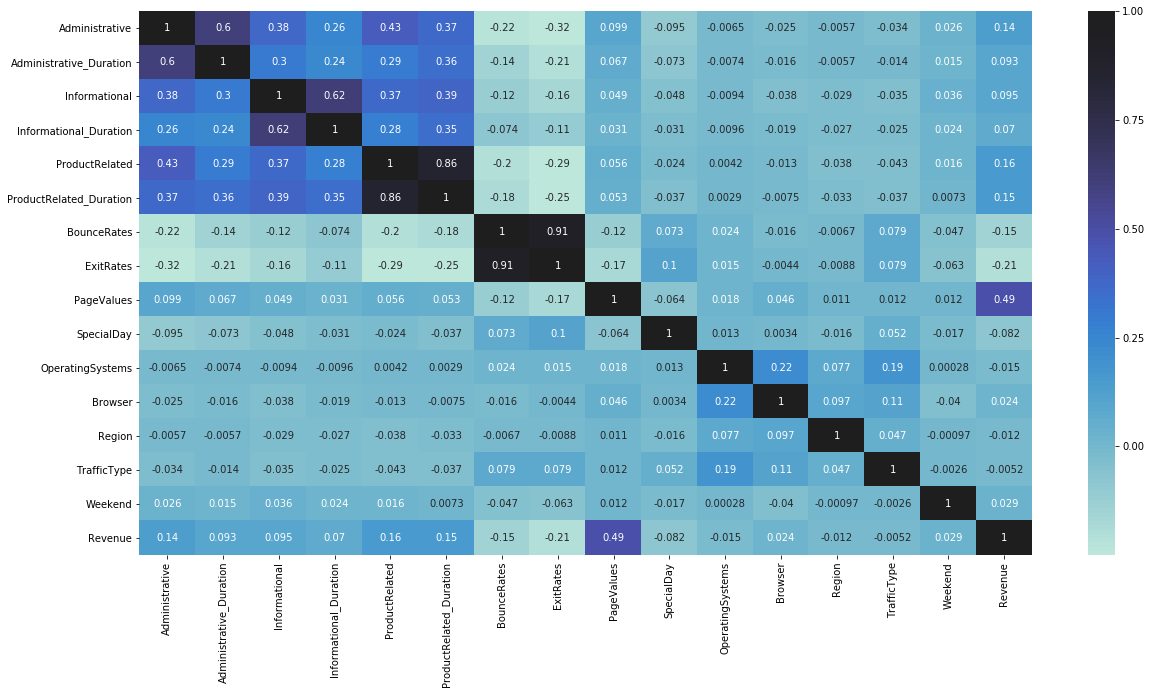

In [11]:
cor=shop.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,center=1,robust=True)
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\corr.png')

In [12]:
cor

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601466,0.376782,0.255757,0.430832,0.373647,-0.223474,-0.316192,0.098771,-0.095054,-0.006459,-0.025243,-0.005680,-0.033748,0.026404,0.138631
Administrative_Duration,0.601466,1.000000,0.302647,0.237959,0.288869,0.355238,-0.144128,-0.205618,0.067463,-0.073472,-0.007425,-0.015525,-0.005681,-0.014487,0.014987,0.093395
Informational,0.376782,0.302647,1.000000,0.618965,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,-0.009435,-0.038257,-0.029442,-0.034510,0.035557,0.095085
Informational_Duration,0.255757,0.237959,0.618965,1.000000,0.279966,0.347300,-0.074077,-0.105205,0.030787,-0.030658,-0.009596,-0.019346,-0.027244,-0.024731,0.024054,0.070250
ProductRelated,0.430832,0.288869,0.374098,0.279966,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,0.004193,-0.013326,-0.038318,-0.043235,0.016097,0.158280
ProductRelated_Duration,0.373647,0.355238,0.387446,0.347300,0.860868,1.000000,-0.184409,-0.251645,0.052623,-0.036598,0.002885,-0.007549,-0.033263,-0.036538,0.007293,0.152130
BounceRates,-0.223474,-0.144128,-0.116071,-0.074077,-0.204469,-0.184409,1.000000,0.913436,-0.119357,0.073088,0.023965,-0.016009,-0.006731,0.078894,-0.046870,-0.150621
ExitRates,-0.316192,-0.205618,-0.163539,-0.105205,-0.292219,-0.251645,0.913436,1.000000,-0.174397,0.102899,0.014745,-0.004407,-0.008836,0.078998,-0.062942,-0.206886
PageValues,0.098771,0.067463,0.048539,0.030787,0.056067,0.052623,-0.119357,-0.174397,1.000000,-0.063660,0.018466,0.045510,0.011233,0.012471,0.011993,0.492494
SpecialDay,-0.095054,-0.073472,-0.048328,-0.030658,-0.024190,-0.036598,0.073088,0.102899,-0.063660,1.000000,0.012609,0.003412,-0.016188,0.052273,-0.016792,-0.082468


In [13]:
corr=shop.corr()
corr.sort_values(by=["Revenue"],ascending=False).iloc[0].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492494
ProductRelated             0.158280
ProductRelated_Duration    0.152130
Administrative             0.138631
Informational              0.095085
Administrative_Duration    0.093395
Informational_Duration     0.070250
Weekend                    0.029293
Browser                    0.023869
TrafficType               -0.005212
Region                    -0.011717
OperatingSystems          -0.014740
SpecialDay                -0.082468
BounceRates               -0.150621
ExitRates                 -0.206886
Name: Revenue, dtype: float64

In [14]:
shop.to_csv(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\shop.csv')

In [15]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


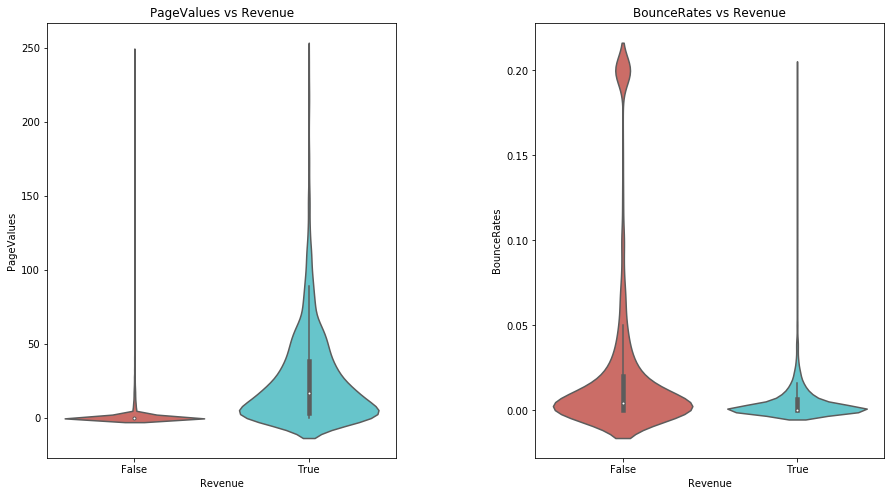

In [16]:
fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
_ = sns.violinplot(x="Revenue", y="PageValues", data=shop[shop['PageValues']<250], scale="width", palette = 'hls').set_title('PageValues vs Revenue')

ax = fig.add_subplot(1, 2, 2)
_ = sns.violinplot(x="Revenue", y="BounceRates", data=shop, scale="width", palette = 'hls').set_title('BounceRates vs Revenue')
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\violin_plot.png')

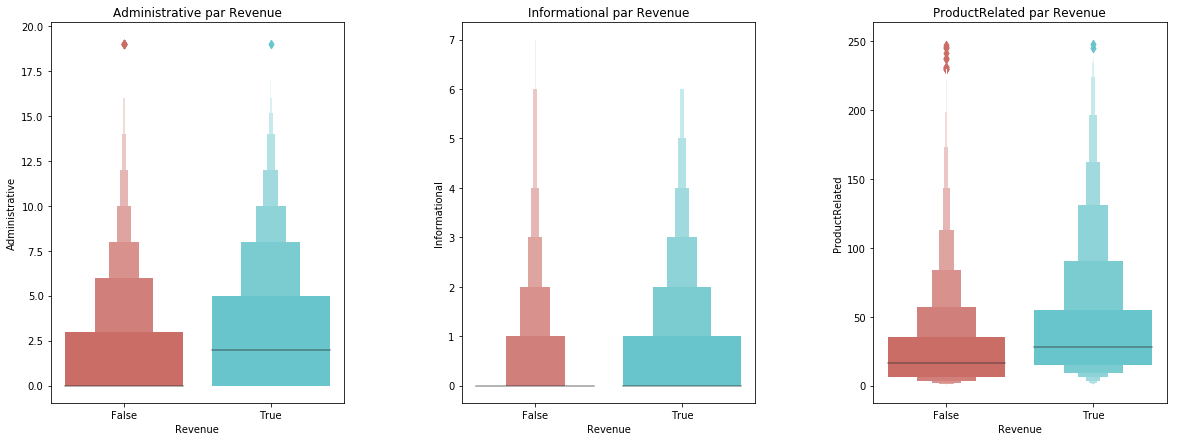

In [17]:
fig = plt.figure(figsize = (20,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
data=shop
ax = fig.add_subplot(1, 3, 1)
_ = sns.boxenplot(x="Revenue", y="Administrative", data=data[data["Administrative"]<20], palette = 'hls').set_title('Administrative par Revenue')

ax = fig.add_subplot(1, 3, 2)
_ = sns.boxenplot(x="Revenue", y="Informational", data=data[data["Informational"]<8], palette = 'hls').set_title('Informational par Revenue')

ax = fig.add_subplot(1, 3, 3)
_ = sns.boxenplot(x="Revenue", y="ProductRelated", data=data[data["ProductRelated"]<250],palette = 'hls').set_title('ProductRelated par Revenue')
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\boxen_plot.png')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


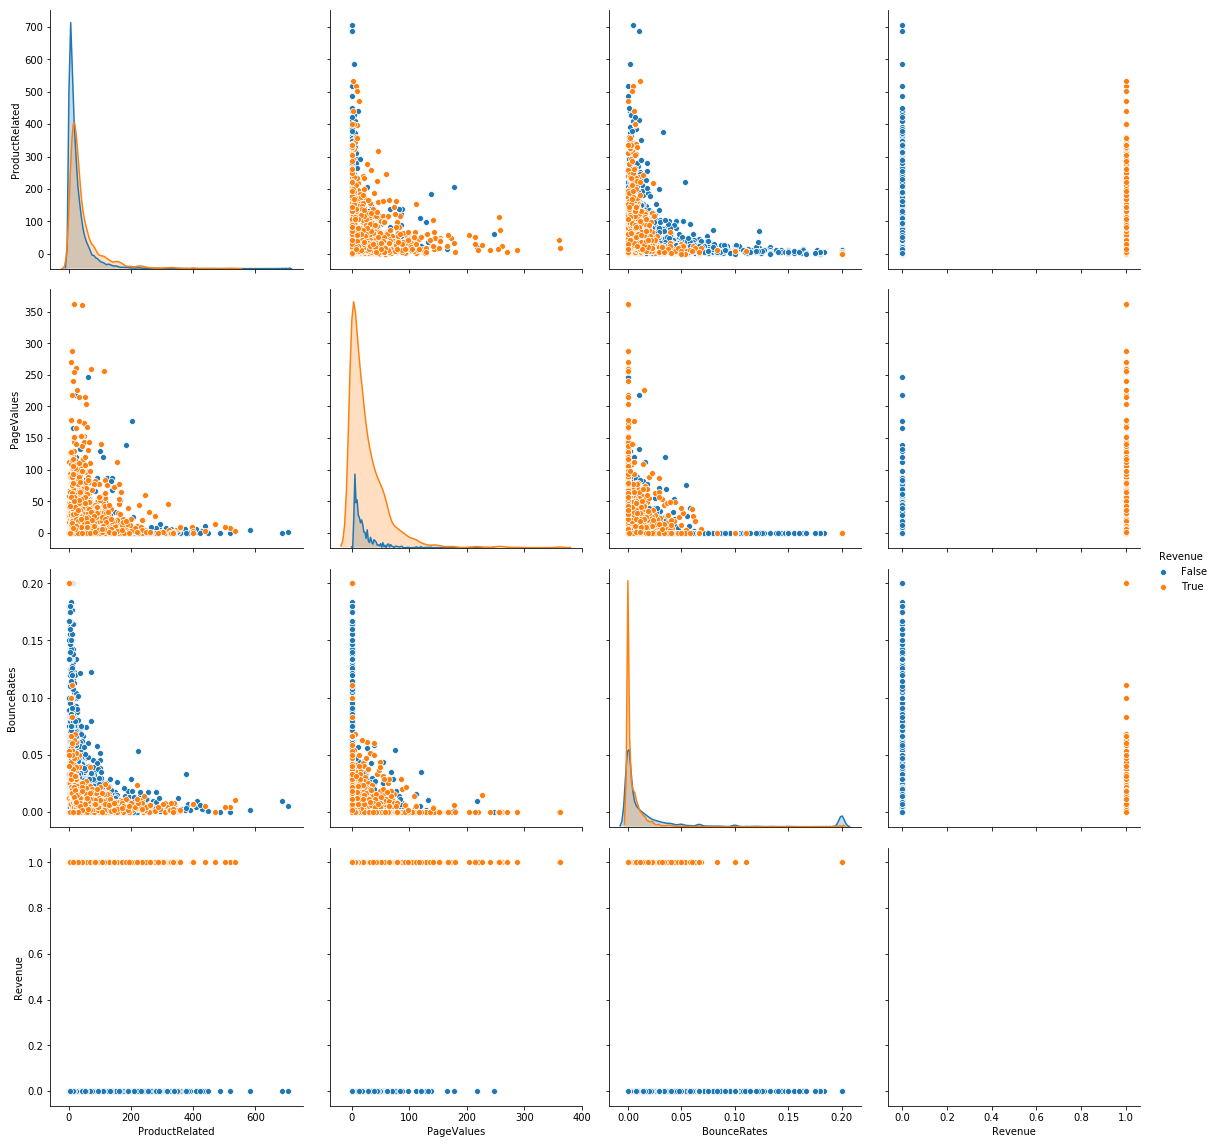

In [18]:
sns.pairplot(shop[['ProductRelated','PageValues','BounceRates','Revenue']],hue='Revenue', height=4)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


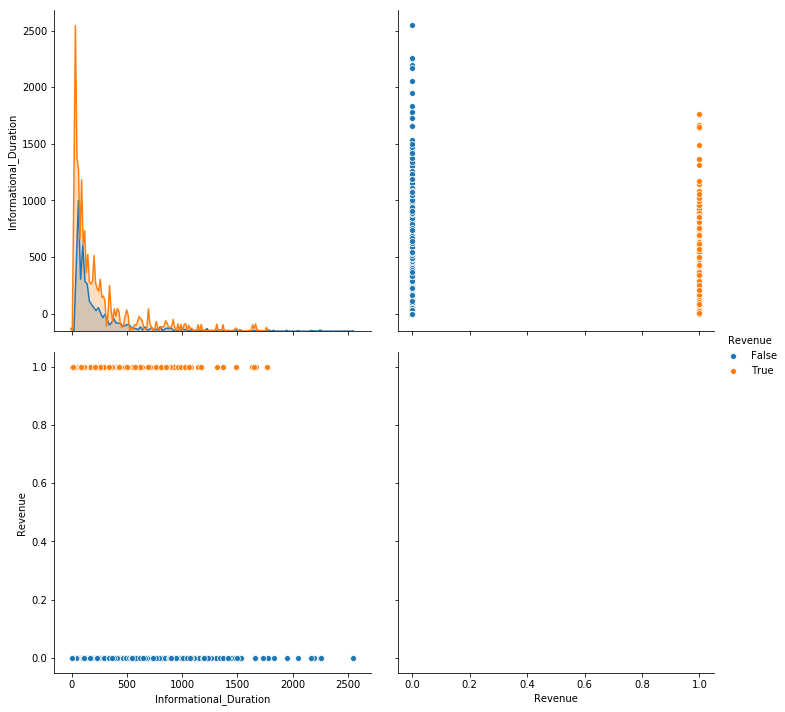

In [19]:
sns.pairplot(shop[['Informational_Duration','Revenue']],hue='Revenue', height=5)



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


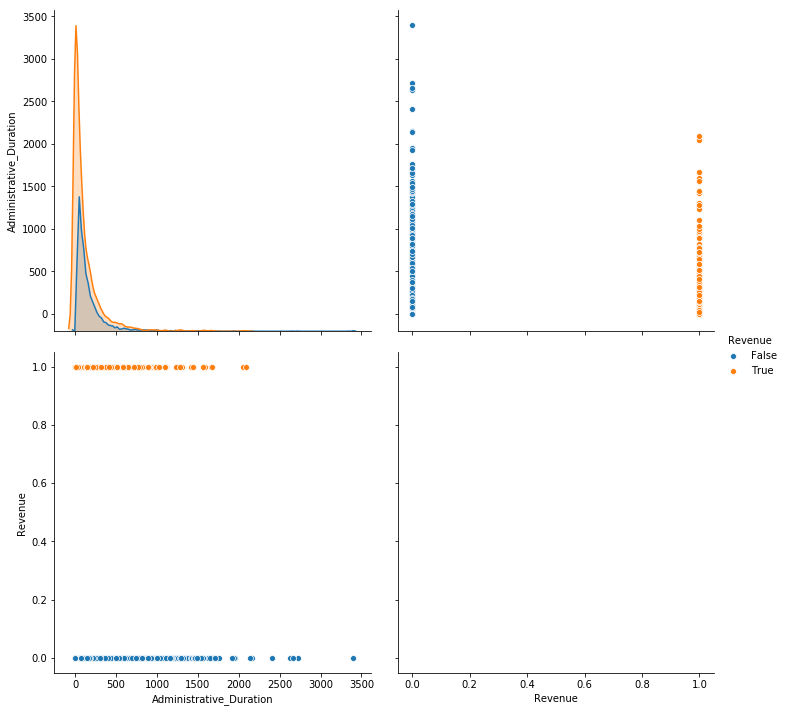

In [20]:
sns.pairplot(shop[['Administrative_Duration','Revenue']],hue='Revenue', height=5)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


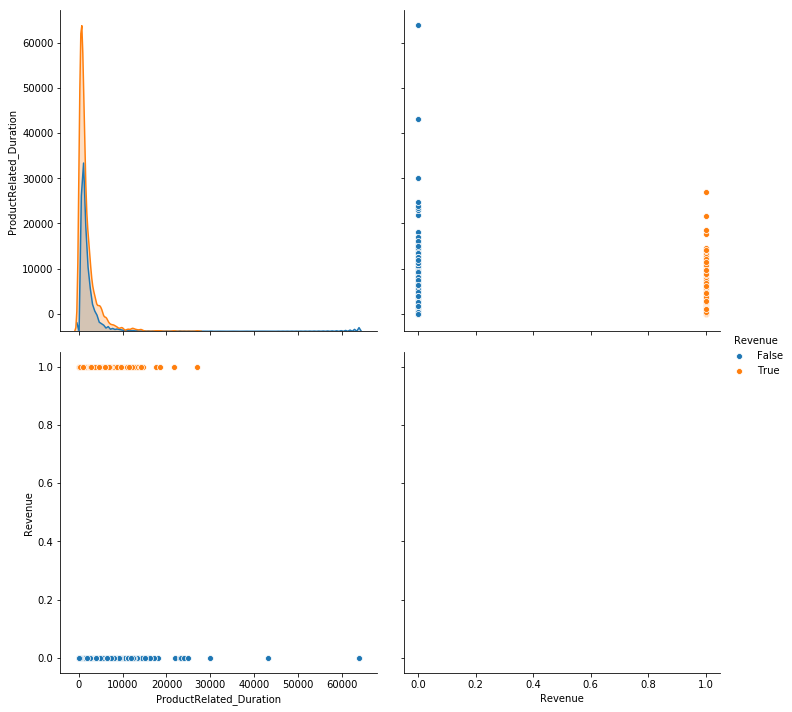

In [21]:
sns.pairplot(shop[['ProductRelated_Duration','Revenue']],hue='Revenue', height=5)


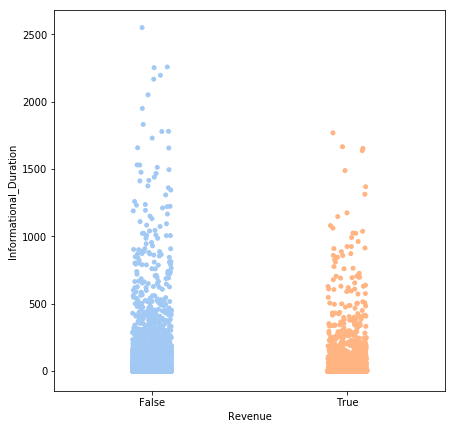

In [22]:
plt.figure(figsize=(7,7))
sns.stripplot(shop['Revenue'], shop['Informational_Duration'], palette = 'pastel')


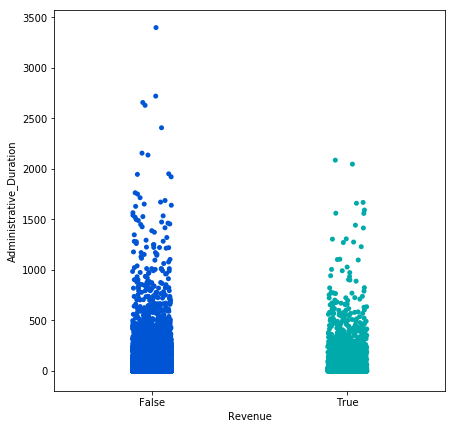

In [23]:
plt.figure(figsize=(7,7))
sns.stripplot(shop['Revenue'], shop['Administrative_Duration'], palette = 'winter')

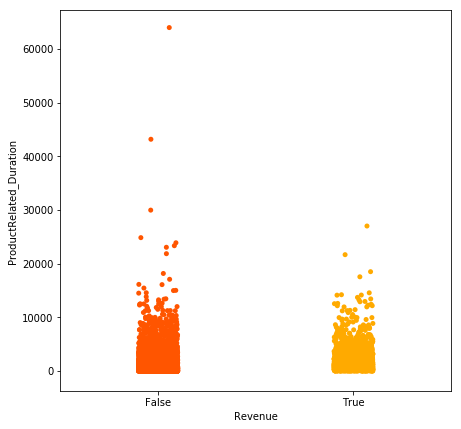

In [24]:
plt.figure(figsize=(7,7))
sns.stripplot(shop['Revenue'], shop['ProductRelated_Duration'], palette = 'autumn')

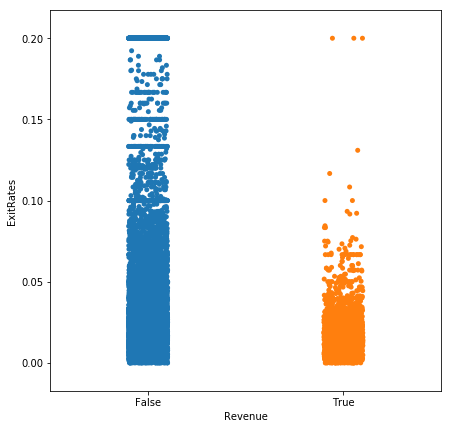

In [25]:
plt.figure(figsize=(7,7))
sns.stripplot(shop['Revenue'], shop['ExitRates'])

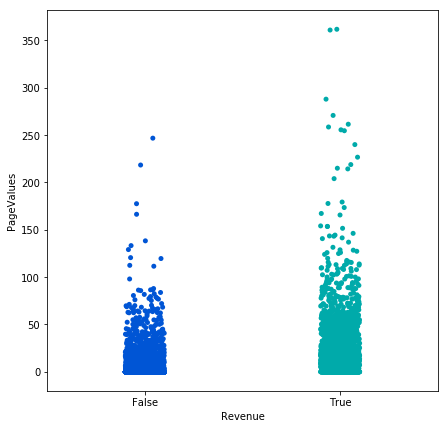

In [26]:
plt.figure(figsize=(7,7))
sns.stripplot(shop['Revenue'], shop['PageValues'],palette='winter')

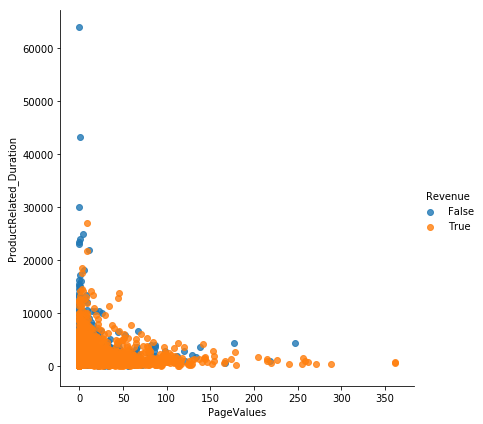

In [27]:
sns.lmplot('PageValues','ProductRelated_Duration',hue='Revenue',data=shop,fit_reg=False,height=6)

In [28]:
X=shop.drop(columns='Revenue')
y=shop['Revenue']

In [29]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [42]:
shop['Revenue'].value_counts(normalize=True)*100

False    84.507957
True     15.492043
Name: Revenue, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

False    0.844968
True     0.155032
Name: Revenue, dtype: float64

In [44]:
y_test.value_counts()

False    2082
True      382
Name: Revenue, dtype: int64

In [45]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [52]:
dummies_pipe = Pipeline([('dummies',GetDummiesTransformer(['Month','Weekend','VisitorType']))])

In [65]:
pipe_num = Pipeline([
    #('kbest',kbest),
    ('columnselector',ColumnSelector(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']))])
#     ('scale', StandardScaler()),
#     ('classifier', None)

In [66]:
# CORREGIR ESTA CELL
union = make_union(pipe_num, pipe_dummies)
pipe_master = Pipeline([
    ('union', union),
    ('scale', StandardScaler()),
    ('clf', None)
])

In [67]:
union.fit_transform(X_train)

ValueError: could not convert string to float: 'Nov'

In [ ]:
X_train=pd.concat([X_train,dummies],axis=1)
X_train.drop(columns=['Month','Weekend','VisitorType'],inplace=True)

In [ ]:
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()
y_train=lenc.fit_transform(y_train)

In [ ]:
X_train.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
seed = 42


In [ ]:
#dummies_pipe = make_pipeline(GetDummiesTransformer(['Month','Weekend','VisitorType']))

In [ ]:
#dummies_pipe.fit_transform(X_train)

In [ ]:
X_train

# Feature Selection con RFE

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE,RFECV,chi2
#kbest = SelectKBest(f_classif)

In [ ]:
estimator = RandomForestClassifier(n_estimators=600)
selector_5 = RFE(estimator, n_features_to_select=5, step = 1)
selector_10 = RFE(estimator, n_features_to_select=10, step = 1)
selector_15 = RFE(estimator, n_features_to_select=15, step = 1)
selector_20 = RFE(estimator, n_features_to_select=20, step = 1)


_ = selector_5.fit(X_train, y_train)
_ = selector_10.fit(X_train, y_train)
_ = selector_15.fit(X_train, y_train)
_ = selector_20.fit(X_train, y_train)


scores = pd.DataFrame()
scores["Attribute Name"] = X_train.columns
scores["Ranking_5"] = selector_5.ranking_
scores["Support_5"] = selector_5.support_
scores["Ranking_10"] = selector_10.ranking_
scores["Support_10"] = selector_10.support_
scores["Ranking_15"] = selector_15.ranking_
scores["Support_15"] = selector_15.support_
scores["Ranking_20"] = selector_20.ranking_
scores["Support_20"] = selector_20.support_

scores.sort_values(by='Ranking_5')

In [ ]:
scores.to_csv(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\scores_rfe.csv')

# Realizamos una busqueda de Modelos y optimizacion de Hiperparametros mediante GridSearch

In [ ]:
kf=KFold(n_splits=5,shuffle=True)

In [ ]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
pipe = Pipeline([#('kbest',kbest),
                 ('scale', StandardScaler()),
                 ('classifier', None)])

grid = [dict(classifier__C=[1,1e20],
             classifier__solver=['lbfgs'],
             classifier__max_iter=[300,500],
             classifier__class_weight=['balanced',None],
             classifier=[LogisticRegression()]),
        dict(classifier=[BernoulliNB()]),
        dict(classifier=[GaussianNB()]),
        #dict(kbest__k=[1,2,3,4]),
        dict(classifier__n_estimators=[600],
             classifier__random_state=[seed],
             classifier__min_samples_split=[2,3],
             classifier__min_samples_leaf=[10,50],
             classifier__bootstrap=[True,False],
             classifier__max_depth=[5,6],
             classifier__class_weight=['balanced',None],
             classifier=[RandomForestClassifier()])]

gs = GridSearchCV(pipe, grid, scoring='roc_auc',verbose=1,
                  cv=skf,return_train_score=False,n_jobs=-1).fit(X_train, y_train)
gs.fit(X_train, y_train).best_params_

In [ ]:
gs.cv_results_

In [ ]:
y_preds_train=gs.predict(X_train)


In [ ]:
fpr_train, tpr_train, thresholds_train =roc_curve(y_train, y_preds_train)
roc_auc_score(y_train, y_preds_train)

In [ ]:
target_names=['No Revenue', 'Revenue']
print("Train Set ")
print(classification_report(y_train, y_preds_train,target_names=target_names))

In [ ]:
model=RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=6,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=10,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=600, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False)

In [ ]:
model.fit(X_train,y_train)

rfecv =   RFECV(estimator=model, cv=kf, scoring='roc_auc',verbose=1,n_jobs=-1)
rfecv.fit(X_train, y_train)
X_new = rfecv.transform(X_train)



In [ ]:
#rfecv.estimator_.feature_importances_ 


rfecv_df = pd.DataFrame()
rfecv_df["Attribute Name"] = X_train.columns
rfecv_df["Ranking"] = rfecv.ranking_
rfecv_df["Support"] = rfecv.support_
rfecv_df['score']=rfecv.estimator.feature_importances_
rfecv_df.sort_values(by='Ranking')

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])
print('Original features :', X_train.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

grid = [
        dict(classifier__n_estimators=[600],
             classifier__random_state=[seed],
             classifier__min_samples_split=[2,3],
             classifier__min_samples_leaf=[4,5],
             classifier__bootstrap=[True,False],
             classifier__max_depth=[5,6],
             classifier__class_weight=['balanced',None],
             classifier=[RandomForestClassifier()])]

gs_rfe = GridSearchCV(pipe, grid, scoring=['recall','f1','roc_auc'],refit='roc_auc',verbose=1,
                  cv=kf,return_train_score=False,n_jobs=-1).fit(X_new, y_train)
gs_rfe.fit(X_new,y_train).best_params_

In [ ]:
#gs_rfe.best_score_

In [ ]:
#f_importance=pd.DataFrame(model.feature_importances_)

f_importance['features']=X_train.columns
f_importance.rename(columns={0:'Feature Importance'},inplace=True)
f_importance["RFECV_Ranking"] = rfecv.ranking_
f_importance["RFECV_Support"] = rfecv.support_

In [ ]:
#f_importance

In [ ]:
#f_importance.sort_values(by='Feature Importance',ascending=False)

In [ ]:
estimator =model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ('0','1'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename ='tree.png')


In [ ]:
estimator_362 =model.estimators_[362]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator_362, out_file='tree_362.dot', 
                feature_names = X_train.columns,
                class_names = ('0','1'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_362.dot', '-o', 'tree_362.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename ='tree_362.png')

In [ ]:
#scaler = StandardScaler()
#X_train_s = scaler.fit_transform(X_train)

In [ ]:
dum_t=trans.transform(X_test)
X_test=pd.concat([X_test,dum_t],axis=1)
X_test.drop(columns=['Month','Weekend','VisitorType'],inplace=True)
#X_test_v = scaler.transform(X_test)

In [ ]:
y_test=lenc.transform(y_test)


In [ ]:
probas = gs.predict_proba(X_test)


In [ ]:
y_preds = gs.predict(X_test)


In [ ]:
y_preds_train=gs.predict(X_train)


In [ ]:
print(classification_report(y_train, y_preds_train))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train,y_preds_train,normalize=True,figsize=(7,7),cmap='Oranges')


In [ ]:
skplt.metrics.plot_precision_recall(y_test, probas,figsize=(10,10))


In [ ]:
target_names=['No Revenue', 'Revenue']
print("Train Set ")
print(classification_report(y_train, y_preds_train,target_names=target_names))
print("-----------------------------------------------------------------")
print("Test Set")
print(classification_report(y_test, y_preds,target_names=target_names))



In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_preds,normalize=True,figsize=(7,7))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_preds,normalize=False,figsize=(7,7),cmap='Greens')

In [ ]:
skplt.metrics.plot_precision_recall(y_test, probas,figsize=(10,10))
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\prec_recall_curve.png')


In [ ]:
probas_train=gs.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, probas_train,figsize=(9,8),title='AUC ROC for Train Set')
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\auc_roc_train.png')



In [ ]:
skplt.metrics.plot_precision_recall(y_train, probas_train,figsize=(10,10))


In [ ]:
skplt.metrics.plot_roc(y_test, probas,figsize=(9,8),title='AUC ROC for Test Set')
plt.savefig(r'C:\Users\Mankarov\Google Drive\Data Science DH\Desafio\Modulo 3\datasets ideas\intencion de compra online\auc_roc_test.png')



In [ ]:
gs.best_score_

In [ ]:
fpr_train, tpr_train, thresholds_train =roc_curve(y_train, y_preds_train)
auc(fpr_train, tpr_train)

In [ ]:
fpr, tpr, thresholds =roc_curve(y_test, y_preds)
auc(fpr, tpr)

In [ ]:
thresholds